In [1]:
import pandas as pd
import pandas as pd 
import numpy as np
import os
from PIL import Image 


c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\JAVIDH S\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
dataset_root = "D:\Dataset\\breast_cancer\\"
desti_root = "D:\Dataset\\breast_cancer_reduced\\"
# desti_root = ""

df_train_calc = pd.read_csv(dataset_root+"csv\calc_case_description_train_set.csv")
df_test_calc = pd.read_csv(dataset_root+"csv\calc_case_description_test_set.csv")

df_train_mass = pd.read_csv(dataset_root+"csv\mass_case_description_train_set.csv")
df_test_mass = pd.read_csv(dataset_root+"csv\mass_case_description_test_set.csv")

df_test_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [3]:
def get_image_loc(path) -> list:
    img_list = []
    for img in os.listdir(dataset_root +'jpeg\\'+ path.split('/')[2]):
        img_list.append(dataset_root +'jpeg\\'+ path.split('/')[2]+'\\'+img)
    return img_list

In [4]:
print(get_image_loc(df_train_calc['image file path'][120]))

['D:\\Dataset\\breast_cancer\\jpeg\\1.3.6.1.4.1.9590.100.1.2.99456166312612236819044550452017912928\\1-282.jpg']


In [5]:
df_reduced_list = [[], []]
df_reduced_list

img_folder_desi = desti_root+'jpeg\\'

img_counter = [0]

In [6]:
def reducer(df, img_counter):
    for idx in range(df.shape[0]):
        for img_loc in get_image_loc(df['image file path'][idx]):
            o_img = Image.open(img_loc)
            r_img = o_img.resize((int(o_img.size[0] - o_img.size[0]*0.9), int(o_img.size[0] - o_img.size[0]*0.9)))
            r_img.save(img_folder_desi + str(img_counter[0])+'.jpeg')
            df_reduced_list[0].append(img_folder_desi + str(img_counter[0])+'.jpeg')
            df_reduced_list[1].append(df['pathology'][idx])
            img_counter[0] += 1

In [7]:
reducer(df_train_calc, img_counter)

In [8]:
reducer(df_test_calc, img_counter)
print(1)
reducer(df_train_mass, img_counter)
print(2)
reducer(df_test_mass, img_counter)
print(3)


1
2
3


In [16]:
df_reduced_list[0][0], df_reduced_list[1][0] 

('D:\\Dataset\\breast_cancer_reduced\\jpeg\\0.jpeg', 'MALIGNANT')

In [30]:
df_reduced_1 = []

for idx in range(len(df_reduced_list[0])):
    df_reduced_1.append([
        df_reduced_list[0][idx], df_reduced_list[1][idx] 
    ])

df_data = pd.DataFrame(df_reduced_1, columns = ['image file path', 'pathology'])

In [31]:
df_data

,image file path,pathology
0,D:\Dataset\breast_cancer_reduced\jpeg\0.jpeg,MALIGNANT
1,D:\Dataset\breast_cancer_reduced\jpeg\1.jpeg,MALIGNANT
2,D:\Dataset\breast_cancer_reduced\jpeg\2.jpeg,BENIGN
3,D:\Dataset\breast_cancer_reduced\jpeg\3.jpeg,BENIGN
4,D:\Dataset\breast_cancer_reduced\jpeg\4.jpeg,BENIGN_WITHOUT_CALLBACK
...,...,...
3563,D:\Dataset\breast_cancer_reduced\jpeg\3563.jpeg,BENIGN_WITHOUT_CALLBACK
3564,D:\Dataset\breast_cancer_reduced\jpeg\3564.jpeg,MALIGNANT
3565,D:\Dataset\breast_cancer_reduced\jpeg\3565.jpeg,MALIGNANT
3566,D:\Dataset\breast_cancer_reduced\jpeg\3566.jpeg,MALIGNANT


In [34]:
df_data.to_csv('dataset_df.csv', index = False)

In [8]:
import pandas as pd
from PIL import Image



In [9]:
df = pd.read_csv('dataset_df.csv')
df

,image file path,pathology
0,D:\Dataset\breast_cancer_reduced\jpeg\0.jpeg,MALIGNANT
1,D:\Dataset\breast_cancer_reduced\jpeg\1.jpeg,MALIGNANT
2,D:\Dataset\breast_cancer_reduced\jpeg\2.jpeg,BENIGN
3,D:\Dataset\breast_cancer_reduced\jpeg\3.jpeg,BENIGN
4,D:\Dataset\breast_cancer_reduced\jpeg\4.jpeg,BENIGN_WITHOUT_CALLBACK
...,...,...
3563,D:\Dataset\breast_cancer_reduced\jpeg\3563.jpeg,BENIGN_WITHOUT_CALLBACK
3564,D:\Dataset\breast_cancer_reduced\jpeg\3564.jpeg,MALIGNANT
3565,D:\Dataset\breast_cancer_reduced\jpeg\3565.jpeg,MALIGNANT
3566,D:\Dataset\breast_cancer_reduced\jpeg\3566.jpeg,MALIGNANT


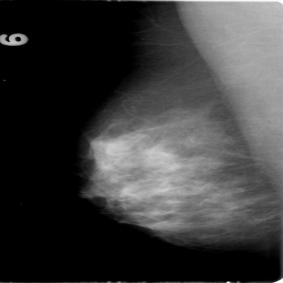

In [12]:
Image.open(df['image file path'][1]) 

In [13]:
df['pathology'][1]

'MALIGNANT'